# Identifying Habitable Exoplanets using Machine Learning
## Data Science Capstone Project of BBM467, 2022 Fall

#### Hikmet Güner, Deniz Erkin Kasaplı
#### 21946179, 21946328

Clustering exoplanets using machine learning in order to gather insight about potentially habitable planets outside of our solar system.
Considering the fact that even the closest planets outside of the solar system are unreachable, there is no way to classify a planet as habitable or not with accuracy. However, there are some key elements which are considered necessary for habitability. The aim of this project is to gather insight of how grouping planets, without making any habitability indicing calculations, could affect filtering based on habitability. The dataset used for this project is directly fetched from NASA's exoplanet archive, which will be clustered for further analysis. The results could be utilized to filter out false positives, saving time and resources which would be spent on those planets otherwise.


## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Describe the problem here. What are the questions you are trying to solve?

Considering the fact that the tools used to identify exoplanets are biased, it seems plausible to begin the analysis without any prior knowledge of the planet, where the algorithm only groups planets that correleate. Then, from these correleations, more insight could be gained on placing key plantes which are known to be habitable or close to be habitable, such as Earth and Mars. However, these results should not be taken at face value, they exist simply to filter unwanted planets or false positives as much as possible.

Imports required for the notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import normalize


Reading the data, Supressing chained assignment warning, since chained assignment works six to seven times faster

In [2]:
df = pd.read_csv("exoplanets.csv",header=0, index_col=0)
pd.set_option('mode.chained_assignment', None)

## Data Understanding<a class="anchor" id="data_understanding"></a>

The dataset used is directly from NASA's exoplanet archive, which the user "SATHYANARAYAN RAO" has compiled and created a comma-separated value (.csv) version of it.

The dataset could be reached from the link <a href=https://www.kaggle.com/datasets/sathyanarayanrao89/nasa-exoplanetary-system>here</a> ( <a href="exoplanets.csv">.csv format</a>)

The data contains a lot of fields used for labelling, which is not within the interest of the project. A lot of information about the host star of the system is present, which could be used for further analysis, however, due to scope of the project being focused solely on the attributes of the planets, they possess no use for the project. There also exists some columns with no suitalbe definitions found.

You can reach the column analysis spreadsheet from <a href="columns.xlsx">here</a>

In [3]:
df.head(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
5,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-07-23,2011-08,2014-07-23
6,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
7,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2021-09-20,2021-05,2021-09-20
8,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2003-01,2014-08-21
9,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2008-04,2014-08-21


## Data Preparation<a class="anchor" id="data_preparation"></a>

Explain what kind of data transformations, feature selection and/or engineering you will perform.

First, rows missing over %50 of their data will be dropped, since their quantity is a fraction of the data the impact is negligible.

Then, the columns that are not useful for the model will be dropped, refer to [Data Understanding](#data_understanding) for the details about the columns.

Finally an analysis of null values within the remaining data will be conducted. The KNN imputation method seems to consistently fill the missing data based on minimal changes of means and standard deviations before and after the imputation.

### Required function declerations

In [4]:
def get_empty_col(row_index):
    total_nan = 0
    for col in df.columns:
        if pd.isna(df[col][row_index]):
            total_nan += 1
    return total_nan

In [5]:
def get_col_info(col):
    if('err' in col or 'flag' in col):
        return
    mean = df[col].mean()
    std = df[col].std()
    col_max = df[col].max()
    col_min = df[col].min()
    sem = df[col].sem()
    pdf = stats.norm.pdf(df[col].sort_values(),mean,std)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
    fig.suptitle(f'Distribution of {col}')
    #normalize plot
    axes[0].plot(df[col].sort_values(), pdf)
    axes[0].grid(True, alpha=0.3, linestyle="--")
    #box plot
    axes[1].boxplot(df[col].dropna(), showfliers=False)
    #text field
    axes[2].text(0.1,0.7,f'mean: {mean:.9f}',   bbox=dict(facecolor='cyan', alpha=0.4))
    axes[2].text(0.1,0.58,f'std: {std:.9f}',    bbox=dict(facecolor='magenta', alpha=0.4))
    axes[2].text(0.1,0.46,f'max: {col_max:.9f}',bbox=dict(facecolor='blue', alpha=0.4))
    axes[2].text(0.1,0.34,f'min: {col_min:.9f}',bbox=dict(facecolor='green', alpha=0.4))
    axes[2].text(0.1,0.22,f'err: {sem:.9f}',    bbox=dict(facecolor='red', alpha=0.6))
    axes[2].set_yticks([])
    axes[2].set_xticks([])
    fig.tight_layout()

### Checking DataFrame to find the percentage of missing data in each row

##### Find the number of empty columns per row, append it to the dataframe

In [6]:
df['empty_col_count'] = 0
for i in df.index:
    df['empty_col_count'][i] = get_empty_col(i)

##### Sort rows by number of empty columns and last update, filter out the old ones if there are no missing columns in the updated entries

In [7]:
df = df.sort_values(['empty_col_count','rowupdate'], ascending=[True,True]).drop_duplicates('pl_name').sort_index()

##### Checking the maximum and the minimum amount of missing columns, comparing it to the total amount of columns

In [8]:
print('Max:\t', df['empty_col_count'].max())
print('Min:\t',df['empty_col_count'].min())
print('Total:\t',len(df.columns))

Max:	 61
Min:	 0
Total:	 93


##### Dropping rows missing over 50% of columns

In [9]:
df = df[df['empty_col_count'] < 50]

### Checking DataFrame to find the percentage of missing data in each column

##### Initializing drop columns list

In [10]:
drop_columns = []

##### Unnecessary Columns

In [11]:
drop_columns.extend([
    'default_flag',
    'discoverymethod',
    'disc_year',
    'disc_facility',
    'soltype',
    'pl_controv_flag',
    'pl_refname',
    'sy_refname',
    'st_refname',
    'rastr',
    'ra',
    'decstr',
    'dec',
    'st_metratio',
    'pl_pubdate',
    'releasedate',
    'pl_radjlim',
    'pl_bmassprov',
    'pl_bmasselim',
    'pl_bmassjlim',
    'pl_orbperlim',
    'pl_orbsmaxlim',
    'pl_radelim',
    'pl_orbeccenlim',
    'pl_insollim',
    'pl_eqtlim',
    'st_tefflim',
    'st_radlim',
    'st_masslim',
    'st_metlim',
    'st_metratio',
    'st_logglim',
    'pl_bmasseerr2',
    'pl_bmassjerr2',
    'pl_orbsmaxerr2',
    'st_tefferr2',
    'st_raderr2',
    'st_masserr2',
    'st_meterr2',
    'st_loggerr2',
    'sy_vmagerr2',
    'sy_kmagerr2',
    'sy_gaiamagerr2',
    'pl_radeerr2',
    'pl_orbpererr2',
    'pl_insolerr2',
    'sy_disterr2'
    ])

##### Missing over 70%, will be dropped

In [12]:
for name, val in df.items():
    na_ratio =  val.isnull().sum() / len(val)
    if(na_ratio > 0.7):
        print(f"{name:<16} {na_ratio*100:.3f}%")
        drop_columns.append(name)

pl_radjerr1      70.047%
pl_radjerr2      70.047%
pl_orbeccenerr1  75.360%
pl_orbeccenerr2  75.360%
pl_eqterr1       78.402%
pl_eqterr2       78.402%
st_spectype      78.077%


##### Dropping columns

In [13]:
df = df.drop(columns=drop_columns)
df.head(10)

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,...,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1,rowupdate,empty_col_count
0,11 Com b,11 Com,2,1,326.0300,0.3200,1.290,0.050,NaN,NaN,...,93.1846,1.92380,4.72307,0.023,2.282,0.346,4.44038,0.003848,2014-05-14,16
4,11 UMi b,11 UMi,1,1,516.2200,3.2500,1.540,0.070,NaN,NaN,...,125.3210,1.97650,5.01300,0.005,1.939,0.270,4.56216,0.003903,2018-04-25,16
6,14 And b,14 And,1,1,185.8400,0.2300,0.830,NaN,NaN,NaN,...,75.4392,0.71400,5.23133,0.023,2.331,0.240,4.91781,0.002826,2014-05-14,24
7,14 Her b,14 Her,1,2,1766.4100,0.6700,2.830,0.041,NaN,NaN,...,17.9323,0.00730,6.61935,0.023,4.714,0.016,6.38300,0.000351,2021-09-20,17
19,16 Cyg B b,16 Cyg B,3,1,799.5000,0.6000,1.680,0.030,NaN,NaN,...,21.1397,0.01100,6.21500,0.016,4.651,0.016,6.06428,0.000603,2018-04-25,17
20,17 Sco b,17 Sco,1,1,578.3800,2.0100,1.450,0.020,NaN,NaN,...,124.9530,2.59000,5.22606,0.023,2.094,0.244,4.75429,0.005055,2021-10-25,16
21,18 Del b,18 Del,2,1,993.3000,3.2000,2.600,NaN,NaN,NaN,...,76.2220,0.62170,5.51048,0.023,3.366,0.204,5.27476,0.002654,2014-05-14,26
25,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,NaN,NaN,330.000,NaN,NaN,NaN,...,139.1350,1.33200,12.61800,0.069,8.916,0.021,12.05720,0.002275,2015-04-01,28
27,24 Boo b,24 Boo,1,1,30.3506,0.0078,0.190,0.012,NaN,NaN,...,95.9863,0.63685,5.59000,0.001,3.159,0.280,5.33390,0.002000,2018-04-25,16
28,24 Sex b,24 Sex,1,2,452.8000,2.1000,1.333,0.004,NaN,NaN,...,72.0691,0.68540,6.45350,0.023,4.285,0.016,6.20374,0.000498,2014-05-14,17


### Filling Empty Columns

##### Missing over 30%, lower than 70%, will be filled

In [14]:
for name, val in df.items():
    na_ratio =  val.isnull().sum() / len(val)
    if na_ratio > 0.3:
        print(f"{name:<16} {na_ratio*100:.3f}%")

pl_orbsmaxerr1   58.264%
pl_radj          69.945%
pl_bmasse        60.596%
pl_bmasseerr1    63.091%
pl_bmassj        60.596%
pl_bmassjerr1    63.111%
pl_insol         40.986%
pl_insolerr1     41.452%


##### Missing lower than 30%, will be filled

In [15]:
for name, val in df.items():
    na_ratio =  val.isnull().sum() / len(val)
    if na_ratio < 0.3 and na_ratio != 0:
        print(f"{name:<16} {na_ratio*100:.3f}%")

pl_orbper        1.318%
pl_orbpererr1    2.150%
pl_orbsmax       6.773%
pl_rade          20.402%
pl_radeerr1      20.503%
pl_orbeccen      14.723%
pl_eqt           27.966%
st_teff          2.778%
st_tefferr1      3.995%
st_rad           5.435%
st_raderr1       6.246%
st_mass          0.608%
st_masserr1      3.265%
st_met           7.260%
st_meterr1       9.876%
st_logg          7.017%
st_loggerr1      7.747%
sy_dist          2.190%
sy_disterr1      4.178%
sy_vmag          0.811%
sy_vmagerr1      0.872%
sy_kmag          0.852%
sy_kmagerr1      1.420%
sy_gaiamag       1.683%
sy_gaiamagerr1   1.683%
rowupdate        0.020%


##### Before scaling, check if each data is suitable for scaling

In [16]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4931 entries, 0 to 32551
Columns: 40 entries, pl_name to empty_col_count
dtypes: float64(33), int64(4), object(3)
memory usage: 1.5+ MB


##### Identify non-scalar columns

In [17]:
df.select_dtypes(object).value_counts()

pl_name       hostname    rowupdate 
11 Com b      11 Com      2014-05-14    1
Kepler-299 b  Kepler-299  2014-11-18    1
Kepler-300 b  Kepler-300  2014-11-18    1
Kepler-30 d   Kepler-30   2014-05-14    1
Kepler-30 c   Kepler-30   2014-05-14    1
                                       ..
KELT-21 b     KELT-21     2018-02-01    1
KELT-20 b     KELT-20     2019-12-02    1
KELT-2 A b    KELT-2 A    2019-03-18    1
KELT-19 A b   KELT-19 A   2018-01-08    1
xi Aql b      xi Aql      2014-05-14    1
Length: 4930, dtype: int64

##### Transfer said columns to another dataframe

In [18]:
label_df = df[['pl_name','hostname']]
df = df.drop(['pl_name','hostname','rowupdate','empty_col_count'], axis=1)
label_df.head()

,pl_name,hostname
0,11 Com b,11 Com
4,11 UMi b,11 UMi
6,14 And b,14 And
7,14 Her b,14 Her
19,16 Cyg B b,16 Cyg B


##### Scale the data, using absolute function to prevent negative error margin values from impacting scaling

In [19]:
scaler = MinMaxScaler()
df.apply(np.abs)
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)
df.head(10)

,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbsmax,pl_orbsmaxerr1,pl_rade,pl_radeerr1,pl_radj,pl_bmasse,...,st_logg,st_loggerr1,sy_dist,sy_disterr1,sy_vmag,sy_vmagerr1,sy_kmag,sy_kmagerr1,sy_gaiamag,sy_gaiamagerr1
0,0.333333,0.000000,8.105728e-07,6.808510e-10,0.000171,9.606148e-06,NaN,NaN,NaN,0.348966,...,0.177419,0.090909,0.010443,0.000517,0.094509,0.006569,0.169975,0.033554,0.087725,0.059038
4,0.000000,0.000000,1.283682e-06,6.914894e-09,0.000204,1.344861e-05,NaN,NaN,NaN,0.188874,...,0.073314,0.136364,0.014095,0.000531,0.101625,0.001194,0.159029,0.025942,0.094780,0.059919
6,0.000000,0.000000,4.618415e-07,4.893617e-10,0.000110,NaN,NaN,NaN,NaN,0.086341,...,0.224340,0.063636,0.008426,0.000192,0.106983,0.006569,0.171539,0.022937,0.115386,0.042849
7,0.000000,0.142857,4.393608e-06,1.425532e-09,0.000376,7.877041e-06,NaN,NaN,NaN,0.087244,...,0.488270,0.027273,0.001890,0.000002,0.141046,0.006569,0.247590,0.000501,0.200276,0.003632
19,0.666667,0.000000,1.988359e-06,1.276596e-09,0.000223,5.763689e-06,NaN,NaN,NaN,0.030219,...,0.476540,0.090909,0.002255,0.000003,0.131123,0.004479,0.245580,0.000501,0.181810,0.007620
20,0.000000,0.000000,1.438309e-06,4.276596e-09,0.000192,3.842459e-06,NaN,NaN,NaN,0.077710,...,0.087977,0.036364,0.014053,0.000696,0.106853,0.006569,0.163975,0.023337,0.105912,0.078165
21,0.333333,0.000000,2.470448e-06,6.808511e-09,0.000346,NaN,NaN,NaN,NaN,0.185276,...,0.252199,0.054545,0.008515,0.000167,0.113833,0.006569,0.204570,0.019331,0.136067,0.040119
25,0.000000,0.000000,NaN,NaN,0.043964,NaN,NaN,NaN,NaN,0.169796,...,0.425220,0.127273,0.015665,0.000358,0.288260,0.020305,0.381694,0.001002,0.529028,0.034115
27,0.000000,0.000000,7.505195e-08,1.659572e-11,0.000025,2.305476e-06,NaN,NaN,NaN,0.016369,...,0.193548,0.090909,0.010761,0.000171,0.115785,0.000000,0.197964,0.026943,0.139493,0.029754
28,0.000000,0.142857,1.125921e-06,4.468085e-09,0.000177,7.684918e-07,NaN,NaN,NaN,0.035795,...,0.351906,0.090909,0.008043,0.000184,0.136976,0.006569,0.233899,0.000501,0.189890,0.005952


##### Analyzing plots of each column before imputation

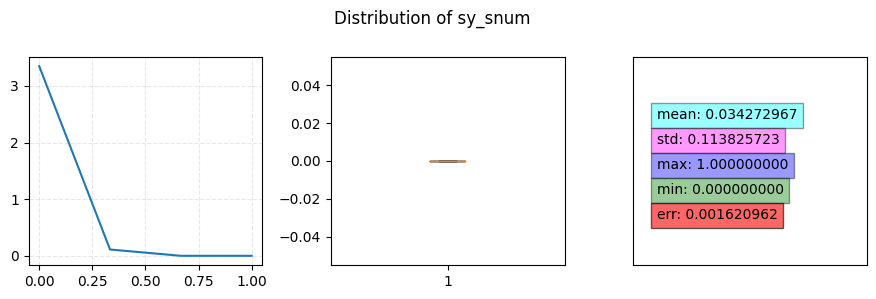

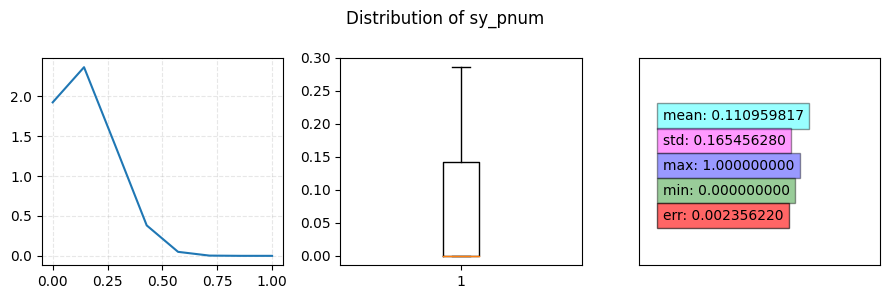

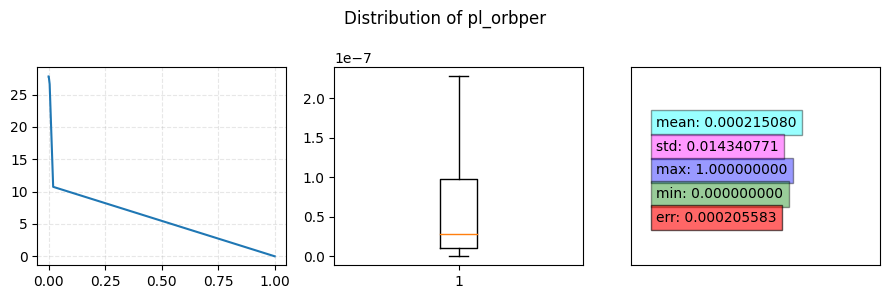

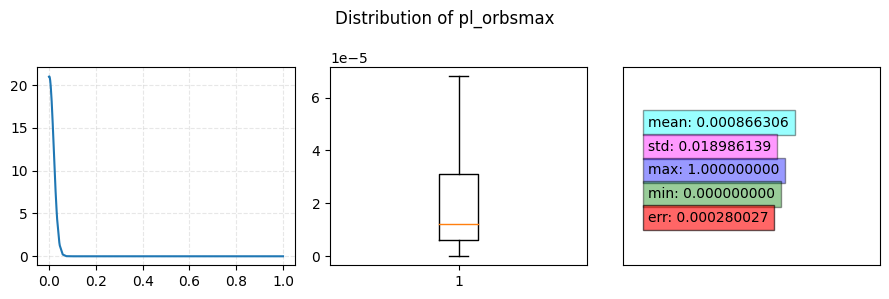

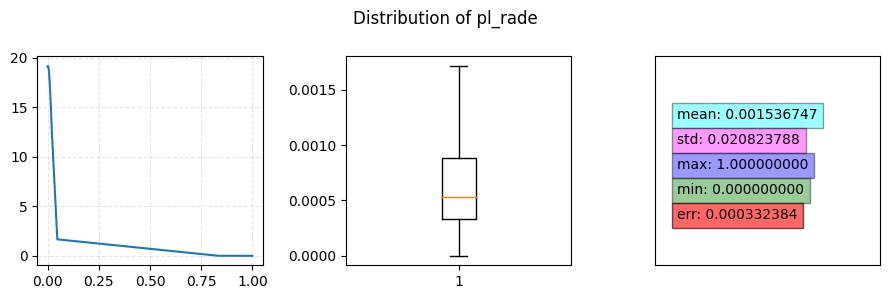

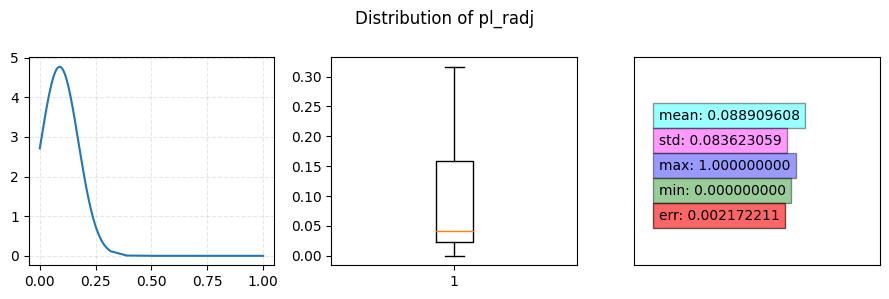

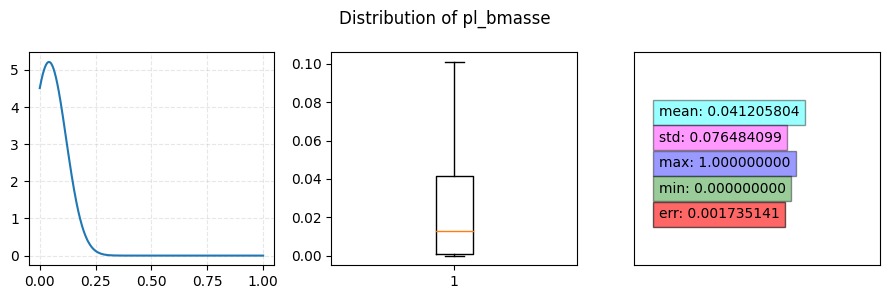

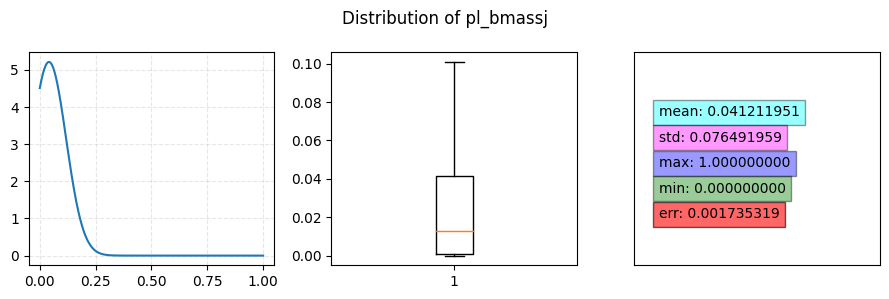

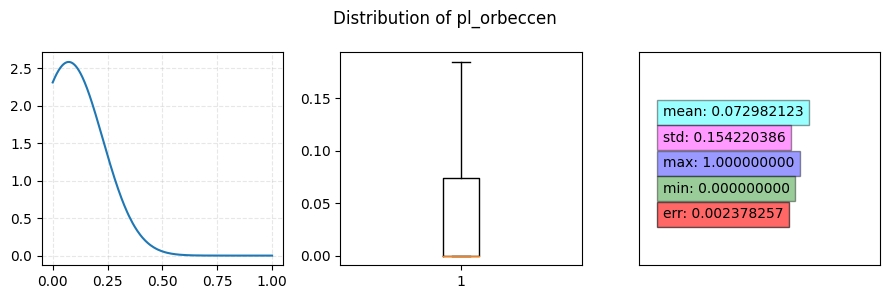

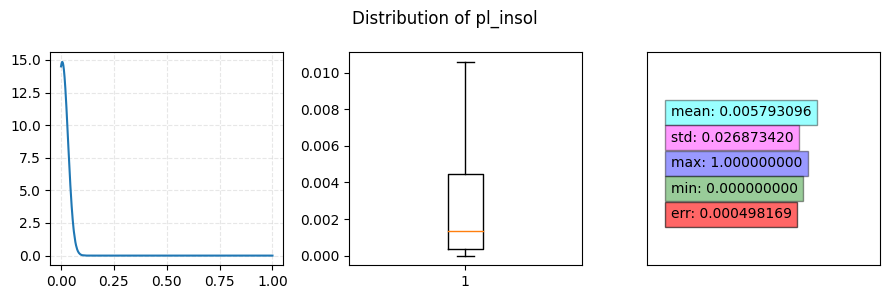

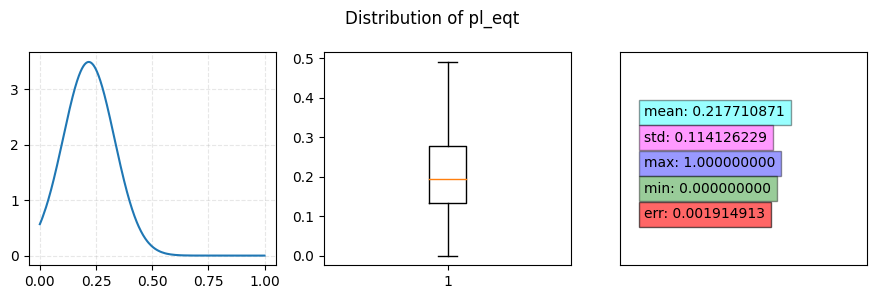

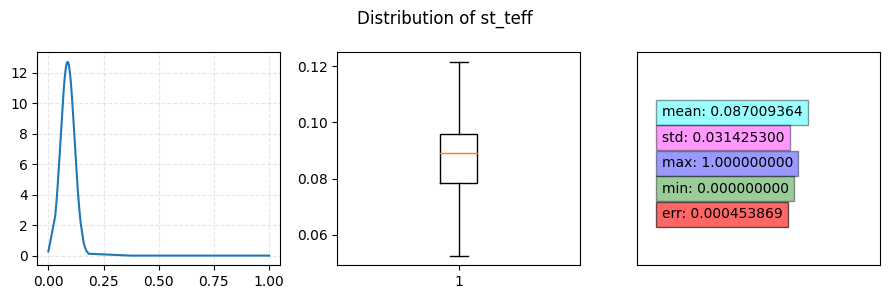

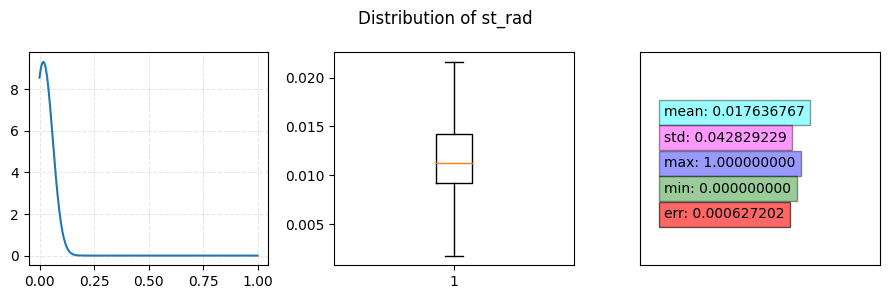

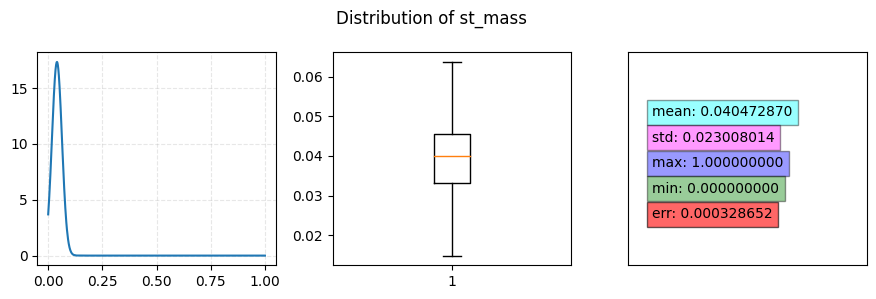

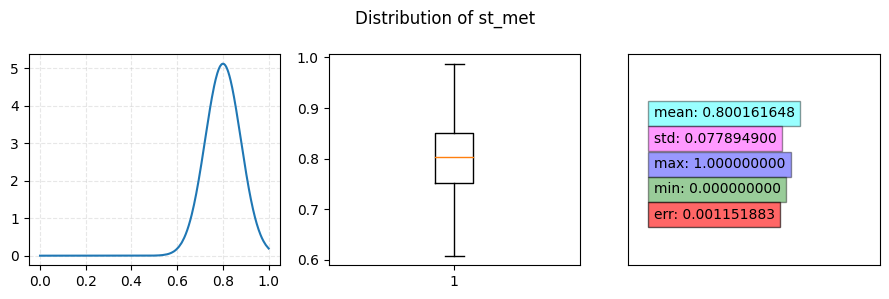

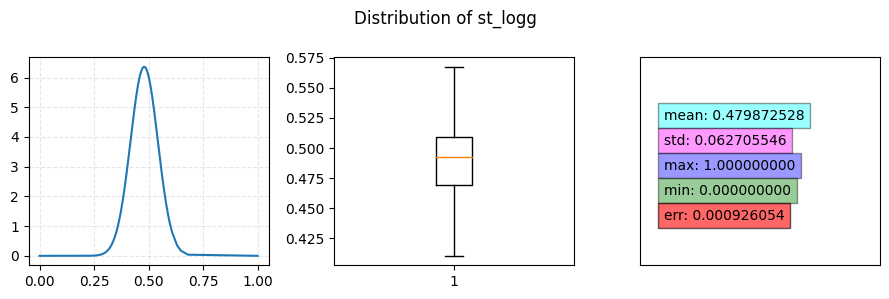

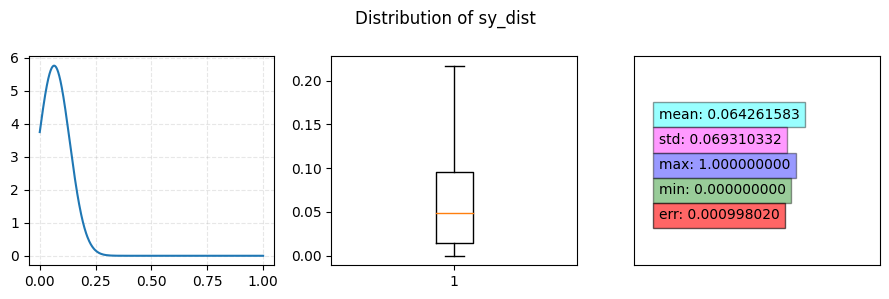

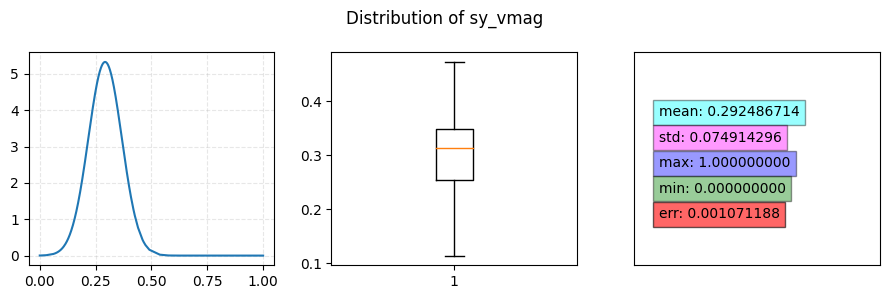

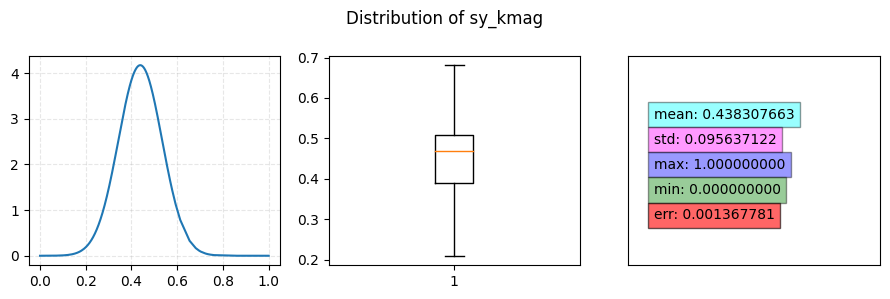

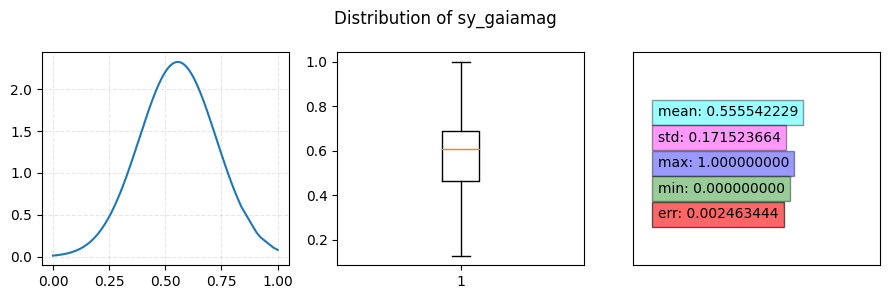

In [20]:
for col in df.columns:
    get_col_info(col)

##### Using KNNImputation to fill the missing values, the optimal K value was found by K = sqrt(N) N being the number of rows in the data

In [21]:
imputer = KNNImputer(n_neighbors=70)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns, index = df.index)

##### Analyzing plots of each column after imputation

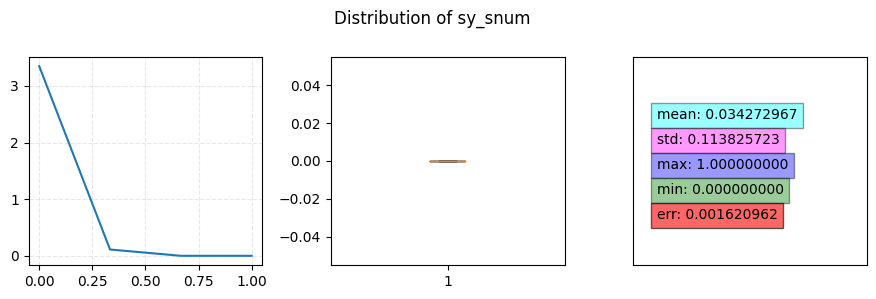

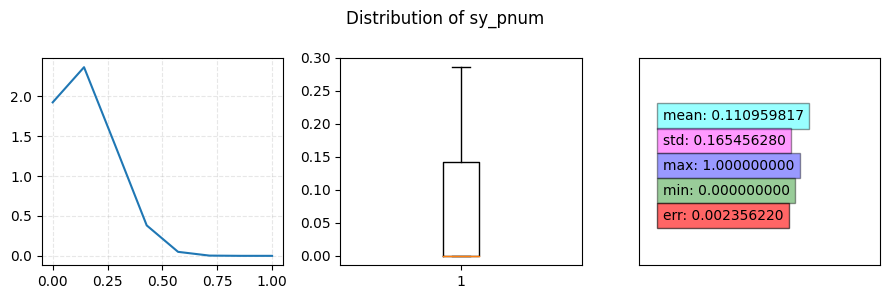

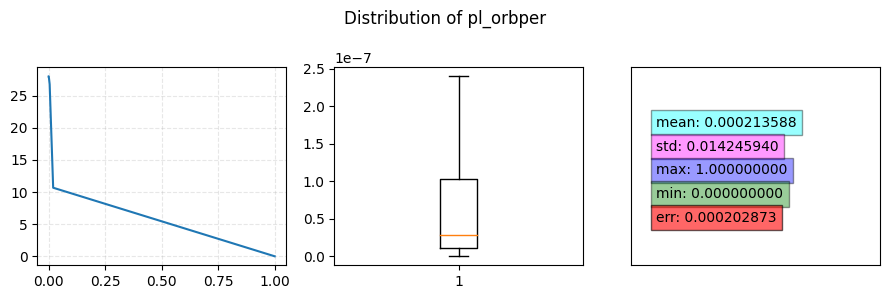

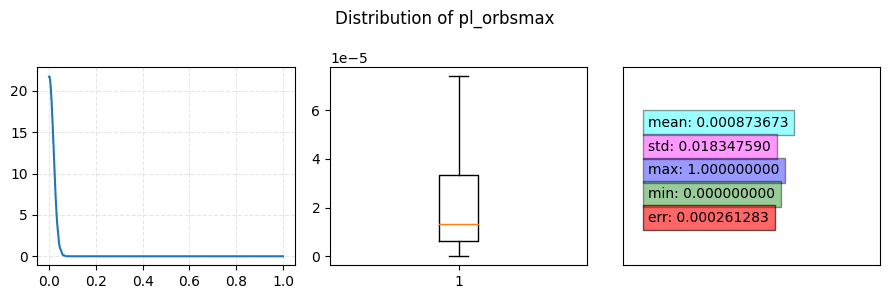

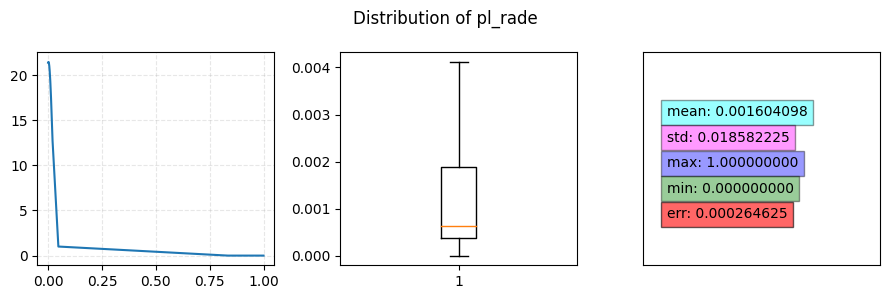

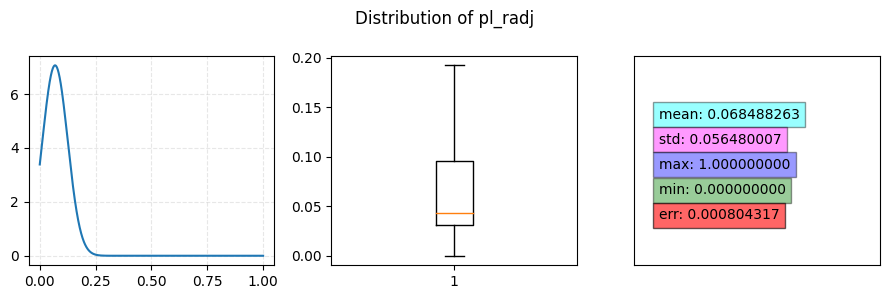

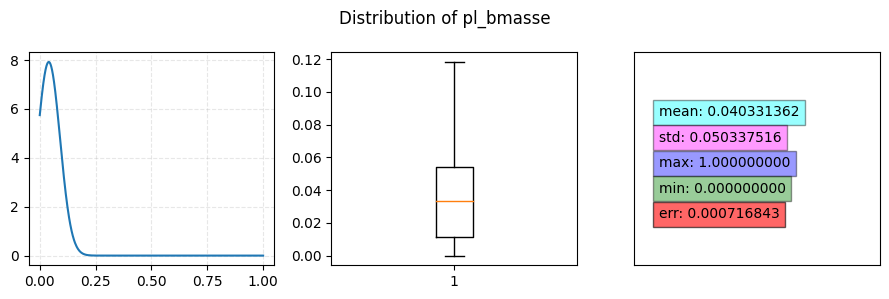

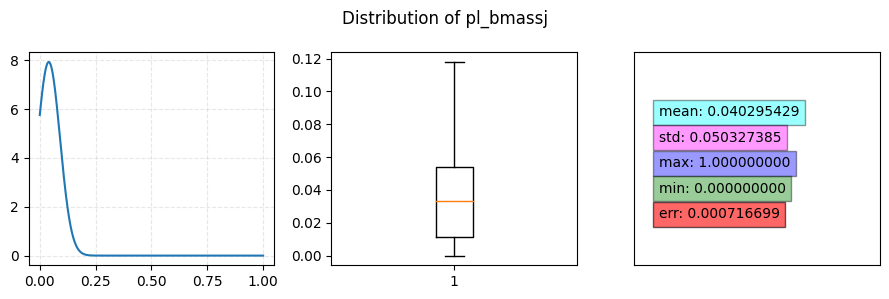

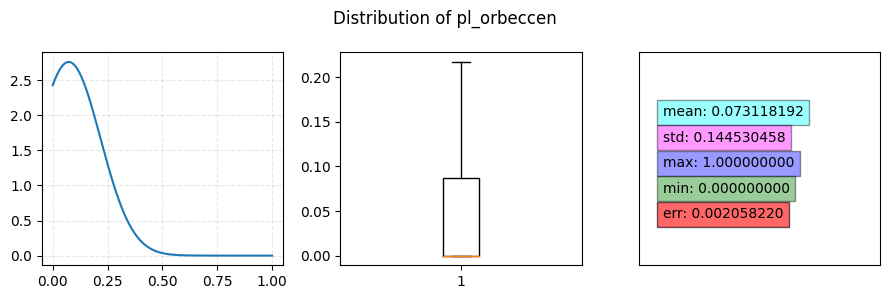

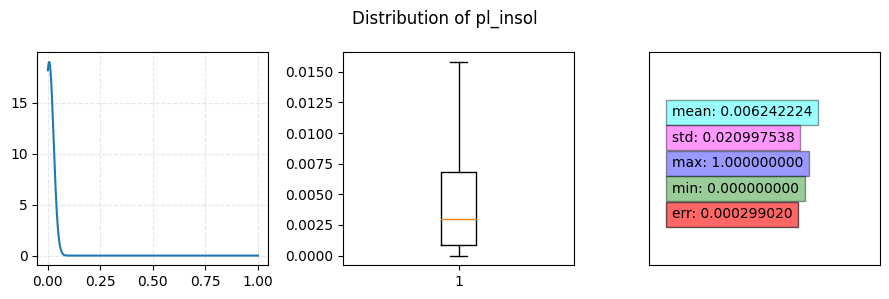

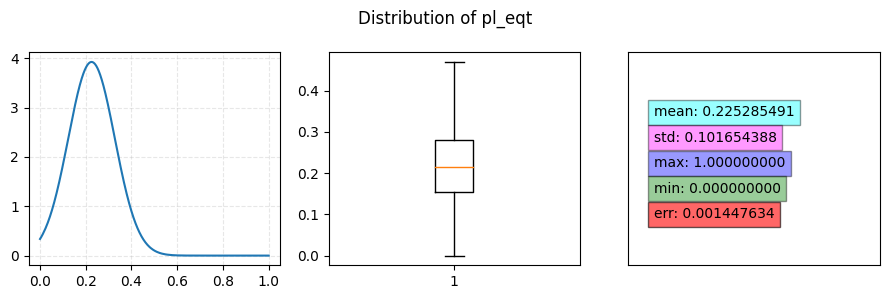

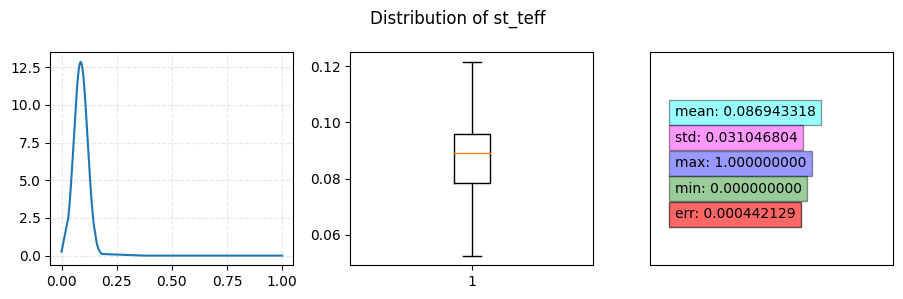

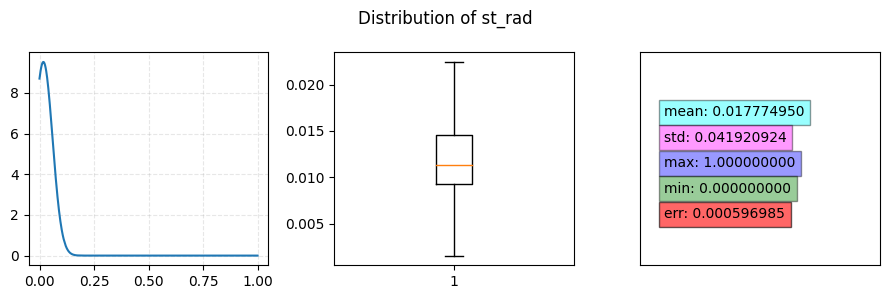

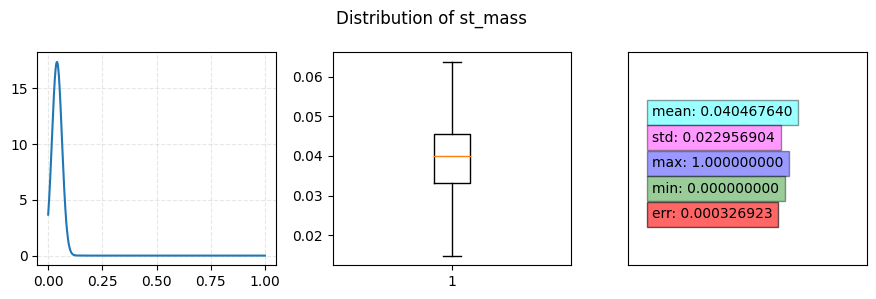

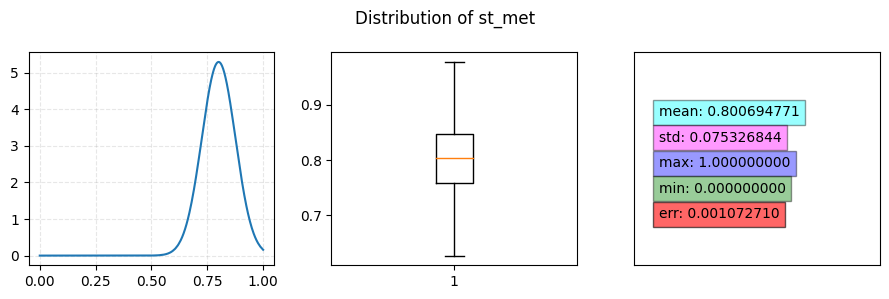

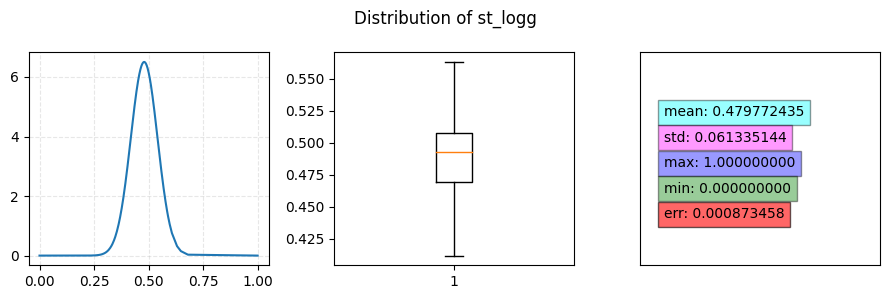

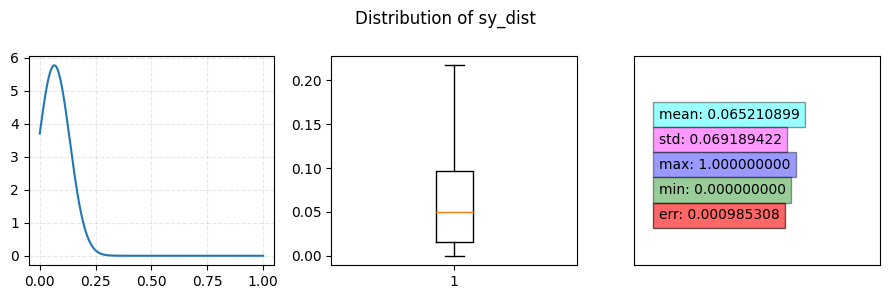

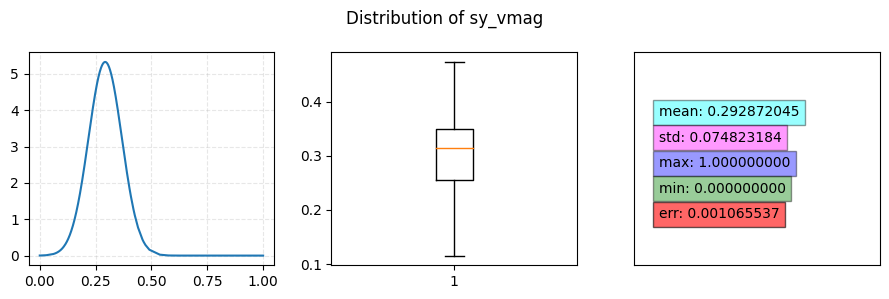

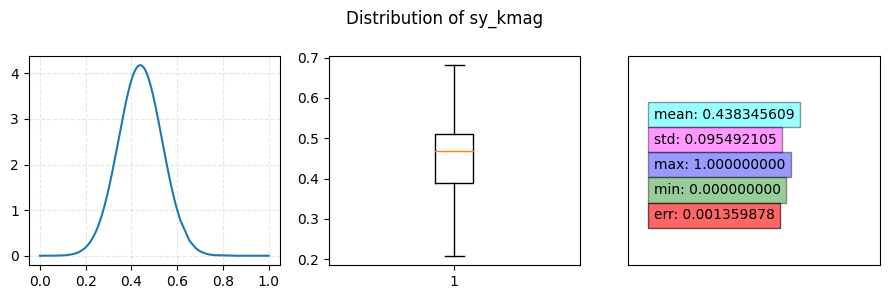

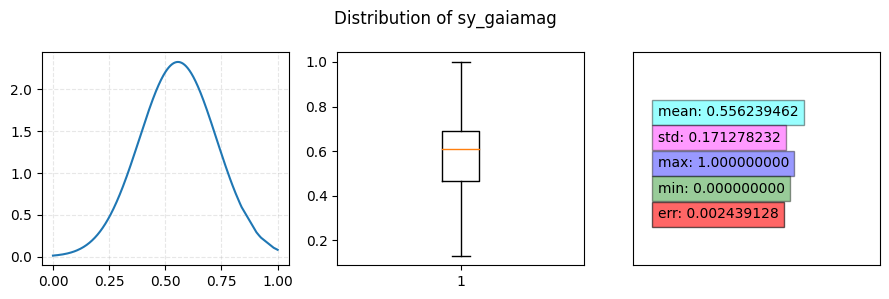

In [22]:
for col in df.columns:
    get_col_info(col)

##### Checking the total number of null values within the dataframe

In [23]:
df.isna().sum().sum()

0

##### Validating columns with error margins, some columns have way lower sensivity, thus it was decided to reduce accuracy to minimalize row termination

In [24]:
field_cols = [
    'pl_orbsmax',
    'pl_bmasse',
    'pl_bmassj',
    'sy_dist',
    'st_teff',
    'st_rad',
    'st_mass',
    'st_met',
    'st_logg',
    'sy_vmag',
    'sy_kmag',
    'sy_gaiamag',
    'pl_rade',
    'pl_orbper',
]

##### Check individual rows and drop whose total error margin is above 50%

### A special case is where metallicity is 0, it must not be zero thus half of the error margin is added to the value in order to fix the problem

In [25]:
overall_error_margins = {i:0 for i in df.index}
for i in df.index:
    for col in field_cols:
        if df[col][i] == 0:
            df[col][i] = df[col + 'err1'][i] / 2
            overall_error_margins[i] = (overall_error_margins[i] + df[col][i]) / 2
        else:
            margin = df[col + 'err1'][i] / df[col][i]
            overall_error_margins[i] = (overall_error_margins[i] + margin) / 2

for k,v in overall_error_margins.items():
    if v > 0.5:
        df.drop(i, axis = 'rows')

##### Dropping the error margin columns

In [26]:
df = df.drop(columns=[col + 'err1' for col in field_cols])

##### A Final Look at the Data

In [27]:
df.head(10)

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,...,ttv_flag,st_teff,st_rad,st_mass,st_met,st_logg,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,0.333333,0.000000,8.105728e-07,0.000171,0.002774,0.145104,0.348966,0.348983,0.250814,0.019658,...,0.0,0.073850,0.226638,0.114225,0.702614,0.177419,0.010443,0.094509,0.169975,0.087725
4,0.000000,0.000000,1.283682e-06,0.000204,0.002989,0.147406,0.188874,0.188882,0.086862,0.007888,...,0.0,0.066726,0.287266,0.076008,0.830065,0.073314,0.014095,0.101625,0.159029,0.094780
6,0.000000,0.000000,4.618415e-07,0.000110,0.002418,0.122121,0.086341,0.086345,0.000000,0.008679,...,0.0,0.075109,0.131161,0.092994,0.738562,0.224340,0.008426,0.106983,0.171539,0.115386
7,0.000000,0.142857,4.393608e-06,0.000376,0.002220,0.109308,0.087244,0.087245,0.398914,0.004890,...,0.0,0.084004,0.011815,0.040764,0.949346,0.488270,0.001890,0.141046,0.247590,0.200276
19,0.666667,0.000000,1.988359e-06,0.000223,0.002533,0.124687,0.030219,0.030220,0.748100,0.007675,...,0.0,0.091661,0.013367,0.043312,0.836601,0.476540,0.002255,0.131123,0.245580,0.181810
20,0.000000,0.000000,1.438309e-06,0.000192,0.003032,0.149514,0.077710,0.077711,0.065147,0.007749,...,0.0,0.063482,0.309225,0.051380,0.813725,0.087977,0.014053,0.106853,0.163975,0.105912
21,0.333333,0.000000,2.470448e-06,0.000346,0.003258,0.160836,0.185276,0.185284,0.086862,0.010599,...,0.0,0.078051,0.101325,0.097240,0.800000,0.252199,0.008515,0.113833,0.204570,0.136067
25,0.000000,0.000000,2.377407e-08,0.043964,0.000524,0.028659,0.169796,0.143910,0.062494,0.021936,...,0.0,0.060576,0.015515,0.025902,0.810938,0.425220,0.015665,0.288260,0.381694,0.529028
27,0.000000,0.000000,7.505195e-08,0.000025,0.002397,0.121190,0.016369,0.016369,0.045603,0.007481,...,0.0,0.076526,0.126865,0.041614,0.565359,0.193548,0.010761,0.115785,0.197964,0.139493
28,0.000000,0.142857,1.125921e-06,0.000177,0.001845,0.090893,0.035795,0.035797,0.097720,0.005288,...,0.0,0.080160,0.058360,0.064968,0.807190,0.351906,0.008043,0.136976,0.233899,0.189890


In [28]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4931 entries, 0 to 32551
Columns: 22 entries, sy_snum to sy_gaiamag
dtypes: float64(22)
memory usage: 1015.1 KB


## Modeling<a class="anchor" id="modeling"></a>

### Optimizing Clustering Method

##### Calculating inertias for elbow method

In [29]:
inertias = []

##### Calculating and plotting inertias

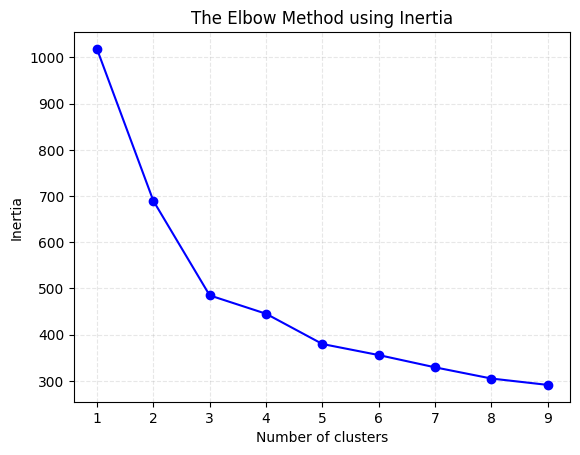

In [30]:
distortions = []
inertias = []
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(df)
    kmeanModel.fit(df)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

Which model will be used? Why? What parameters?

## Evaluation<a class="anchor" id="evaluation"></a>

Evaluate your model. Provide results, tables, charts, etc.

## References<a class="anchor" id="references"></a>

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.\
<a href="https://urc.ucdavis.edu/how-write-abstract"> Undergraduate Research Center, How to Write an Abstract?</a> <br>
<a href="https://app.datacamp.com/learn/courses/unsupervised-learning-in-python"> Datacamp, Unsupervised Machine Learning in Python </a> <br>
<a href="https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/">KNN Imputation in Machine Learning </a> <br>
<a href="https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb"> Optimal K value in KNN Imputation </a> <br>
<a href="https://educationalresearchtechniques.com/2018/10/17/kmeans-clustering-in-python/"> How to utilize the Elbow Method for Finding Optimal Cluster Size </a> <br>
<a href="https://chartio.com/learn/charts/box-plot-complete-guide/"> A Complete Guide to Box Charts <a> <br>
<a href="http://astroweb.case.edu/ssm/ASTR620/mags.html"> Astronomical Magnitude Systems <a> <br>
<a href="https://en.wikipedia.org/wiki/Metallicity"> Metallicity, Wikipedia <a> <br>


**Disclaimer!** <font color='grey'>This notebook was prepared by Hikmet Güner and Deniz Erkin Kasaplı as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>